# AMS 326 Numerical Analysis HW 3

By: Mehadi Chowdhury (115112722)  

Link to GitHub where README, PDF, IPYNB and Seperate Python Files will be hosted: https://github.com/EmceeCiao/AMS_326_HW3 

## Background For Problem 3.1 


<div style="text-align: center;">
    <img src="Problem_3.1.png" alt="Photo of Problem 3.1 Buffon's Discs" style="width:1000px; border:2px solid black;"/>
</div> 

## Problem 3.1

### Problem Description  

For our project, instead of dropping needles, you perform numerical experiments for tossing a disc of diameter d (to be specified below) to parallel lines of distance w = 1. Estimate (numerically, of course) the probability when any part of the disc crosses a parallel line for n = 4,444,444 tosses with each of
the following disc diameters d = 1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 15/10, 20/10, 30/10 

For d < w, you may cross no more than 1 line and the crossing probability depends on “d”. For d > w, you may cross more than 1 line and, as such, you must specify the probabilities for crossing, at least, 1-, 2-, 3-, 4-... lines. 

Please estimate, and make a plot for, the probabilities as a function of d. 

### Algorithm Description 

Since we want to estimate and make a plot for the probabilities for this numerically, we are going to be using a Monte Carlo method to simulate the tossing of a disc with diameter, d, and seeing the number of lines it crosses if the width between each line is 1. To accomplish this however, we must figure out how we are going to simulate this and under what conditions we would reject or accept the result of the simulation for our purposes. I came up with the following method to simulate this disc toss, though they're maybe other methods people can explore to accomplish the same result.    

I noticed that a condition where a line or lines are crossed is if the starting point (bottom) of the disk/the height it's placed at in between two lines is high enough for it's diameter to intersect the next line. Using this idea, we could simulate the experiment by simply generating uniformly distributed random heights for the circle to start at and using the diameter to determine if it crosses or not. I did this by taking the width of the total number of lines crossed and subtracting our diameter from it, giving us the height needed, and then comparing this to the randomly generated height. If our height is greater than or equal to this height needed than we know the circle will be intersecting the next line! This works fine for rejecting as well because if the height needed is > 1 then, our method knows it's impossible as we can't have a height greater than one. Additionally, in the problem we were given that d crosses lines with 100 percent probability if d > the number of lines that needs to be crossed so that was accounted for in my method as well. 

So now that we were able to figure out how to simulate the disc tosses and our acceptance/rejection region, we can simulate the tosses to calculate the probabilities! 

#### Psuedocode 

**Monte Carlo Buffon's Disk Simulation**  

---
$diameters \leftarrow [1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 15/10, 20/10, 30/10] $        
$num\_tosses \leftarrow 4444444 $           
$crossing\_probabilities \leftarrow [] $      
$\text{for diameter in diameters: }$    
&emsp; $succesful\_tosses = [] $  
&emsp; $\text{for j in range(1, 5):}$    
&emsp;&emsp; $\text{Repeat num\_tosses times:}$     
&emsp;&emsp;&emsp; $bottom = uniform\_random(0, 1)$     
&emsp;&emsp;&emsp; $\text{if diameter > j: sucessful\_tosses[j] += num\_tosses and break}$    
&emsp;&emsp;&emsp; $\text{if (diameter < j) and (j - diameter > 1): sucessful\_tosses[j] = 0 and break}$     
&emsp;&emsp;&emsp; $\text{if bottom >= diameter - j: sucessful\_tosses[j] += 1}$     
&emsp; $probabilities = [] $  
&emsp; $\text{for val in sucessful\_tosses:}$  
&emsp;&emsp; $probabilities.append(val/num\_tosses)$    
&emsp; $crossing\_probabilities.append(probabilities)$     

return $crossing\_probabilities$  

---

#### Code 

{0.1: [0.100131760013176, 0.0, 0.0, 0.0], 0.2: [0.1997786449778645, 0.0, 0.0, 0.0], 0.3: [0.30017815501781553, 0.0, 0.0, 0.0], 0.4: [0.3998738649873865, 0.0, 0.0, 0.0], 0.5: [0.4999826749982675, 0.0, 0.0, 0.0], 0.6: [0.5998687349868735, 0.0, 0.0, 0.0], 0.7: [0.700051120005112, 0.0, 0.0, 0.0], 0.8: [0.800214830021483, 0.0, 0.0, 0.0], 0.9: [0.8999971649997165, 0.0, 0.0, 0.0], 1.0: [1.0, 0.0, 0.0, 0.0], 1.5: [1.0, 0.5003678750367875, 0.0, 0.0], 2.0: [1.0, 1.0, 0.0, 0.0], 3.0: [1.0, 1.0, 1.0, 0.0]}


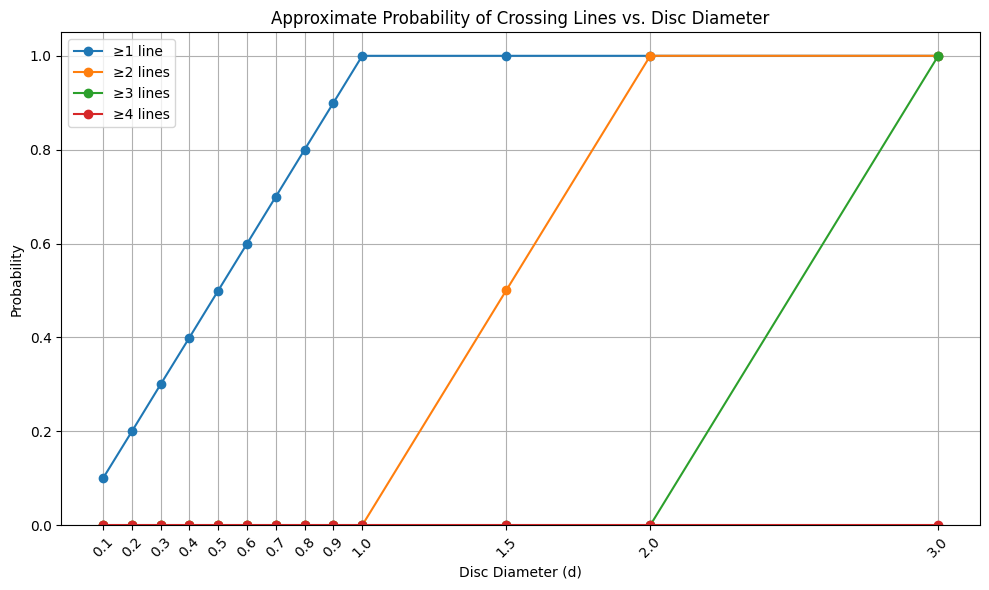

Printing Table of Probabilities From Simulation: 
+-----------------+-----------------+-----------------+-----------------+-----------------+
| Diameter (d)    | P(≥1 line)      | P(≥2 lines)     | P(≥3 lines)     | P(≥4 lines)     |
+=================+=================+=================+=================+=================+
| 0.10            | 0.100131760013  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.20            | 0.199778644978  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.30            | 0.300178155018  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.40            | 0.399873864987  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.50            | 0.499982674998  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.60            | 0.599868734987  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.70            | 0.700051120005  | 0.000000000000  | 0.000000000000  | 0.000000000000  |
| 0.80            | 0.80021483

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def simulate_disc_tosses(diameter, num_tosses):    
    """
    Function to simulate tossing a disc and the lines it crosses  

    Inputs: 
    - diameter: diameter of the disc being tossed  
    - num_tosses: Number of tosses being simulated 

    Outputs: 
    - probabilities: Full array of probabilities for it crossing x number of lines
      meaning 1 line, 2 lines, 3 lines or 4 lines
    """
    # Hashmap to store successful tosses per number of lines being crossed
    successful_tosses = {} 
    for j in range (1, 5): # represents lines being crossed (1 - 4) 
        # print(f"Simulating Crossing {j} lines")   
        # Simulates the bottom/start of the circles num_tosses times
        bottom = np.random.uniform(0, 1, num_tosses) 
        if diameter >= j: # Given in problem
            successful_tosses[j] = num_tosses
        elif diameter < j and j - diameter > 1: 
            successful_tosses[j] = 0 
        else:   
            # We check if any of our bottoms lets us cross a line after crossing  
            # other lines due to the height needed
            height_needed = j - diameter 
            success = np.sum(bottom >= height_needed) 
            successful_tosses[j] = float(success) 
    # Array to store probabilities 
    probabilities = [] 
    for value in successful_tosses.values():   
        # Probability is the number of successes/total
        probabilities.append(value/num_tosses)  
    # print(f"Probabilities for {diameter}: {probabilities}")
    return probabilities # Full array of probabilities for it crossing x-line, meaning 1, 2, 3, 4   

def monte_carlo_disc_toss(diameters, num_tosses):  
    """
    Function to call on list of diameters that we want to simulate tosses for 

    Inputs: 
    - diameters: List of diameters for discs being  
    - num_tosses: Number of tosses being simulated 

    Outputs: 
    - crossing_probabilities: A dictionary of lists of the  
    probabilities of each diameter crossing 1-4 lines 
    """
    # So now this function will actually run this simulation and store the crossing probabilities for each thing  
    crossing_probabilities = {} 
    for diameter in diameters:  
        # print(f"Simulating Diameter: {diameter}") 
        probabilities = simulate_disc_tosses(diameter, num_tosses)  
        crossing_probabilities[diameter] = probabilities  
    return crossing_probabilities  

diameters = [1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 15/10, 20/10, 30/10] 
num_tosses = 4444444 

results = monte_carlo_disc_toss(diameters, num_tosses)  
print(results)

# Extract the x values (diameters) 
x = list(results.keys())
y1 = [results[d][0] for d in x]  # Prob of crossing ≥1 line per key
y2 = [results[d][1] for d in x]  # Prob of crossing ≥2 lines per key
y3 = [results[d][2] for d in x]  # Prob of crossing ≥3 lines per key
y4 = [results[d][3] for d in x]  # Prob of crossing ≥4 lines per key 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label="≥1 line", marker='o')
plt.plot(x, y2, label="≥2 lines", marker='o')
plt.plot(x, y3, label="≥3 lines", marker='o')
plt.plot(x, y4, label="≥4 lines", marker='o')

plt.title("Approximate Probability of Crossing Lines vs. Disc Diameter")
plt.xlabel("Disc Diameter (d)")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.xticks(x, rotation=45)
plt.tight_layout()
plt.show()


print("Printing Table of Probabilities From Simulation: ")
# Get all diameters
diameters = results.keys()

# Header
headers = ["Diameter (d)", "P(≥1 line)", "P(≥2 lines)", "P(≥3 lines)", "P(≥4 lines)"]
col_widths = [15, 15, 15, 15, 15]  # Fixed widths for alignment

# Function to pad each cell
def format_row(values, widths): 
    """ 
    Prints the string we want in this case our values with the correct padding
    """
    return "| " + " | ".join(str(v).ljust(w) for v, w in zip(values, widths)) + " |"

# Print top border
print("+" + "+".join("-" * (w + 2) for w in col_widths) + "+")

# Print header row
print(format_row(headers, col_widths))

# Print header separator
print("+" + "+".join("=" * (w + 2) for w in col_widths) + "+")

# Print rows
for d in diameters:
    row = [f"{d:.2f}"] + [f"{p:.12f}" for p in results[d]]
    print(format_row(row, col_widths))

# Print bottom border
print("+" + "+".join("-" * (w + 2) for w in col_widths) + "+")


### Results 

While the results of this monte carlo simulation will not be the exact same each time, it will be similar, and thus a plot and a table were made showcasing one instance of running this simulation below. 

The plot representing the probabilities as a function of d that we constructed is as follows:  


![Graph of probabilities as a function of d for simulated disc tosses](Problem_3.1_Graph.png) 

I also constructed a table of the probabilities below:  

\begin{array}{|l|c|c|c|c|} \hline \textbf{Diameter} & \textbf{P >= 1 Lines} & \textbf{P >= 2 Lines} & \textbf{P >= 3 Lines} & \textbf{P >= 4 Lines} \\ \hline \text{0.1} & 0.100131760013176 & 0 & 0 & 0 \\ \text{0.2} & 0.1997786449778645 & 0 & 0 & 0 \\ \text{0.3} & 0.30017815501781553  & 0 & 0 & 0 \\ \text{0.4} & 0.3998738649873865 & 0 & 0 & 0  \\ \text{0.5} & 0.4999826749982675 & 0 & 0 & 0 \\ \text{0.6} & 0.5998687349868735 & 0 & 0 & 0 \\ 
\text{0.7} & 0.700051120005112 & 0 & 0 & 0 \\ \text{0.8} & 0.800214830021483 & 0 & 0 & 0 \\ \text{0.9} & 0.8999971649997165 & 0 & 0 & 0 \\ \text{1.0} & 1.0 & 0 & 0 & 0 \\ \text{1.5} & 1.0 & 0.5003678750367875 & 0 & 0 \\ \text{2} & 1.0 & 1.0 & 0 & 0 \\ \text{3} & 1.0 & 1.0 & 1.0 & 0 \\   \hline \end{array}

### Performance 

The performance of a montecarlo simulation is dependent on how many simulations of an event you are performing and how costly it is to simulate such event. In this case as our simulation isn't too costly we can say the time complexity is O(n) where n is the number of simulations being asked for. In terms of space complexity, it is also O(n) as we need to store all the results of our simulations to calculate the probabilities of us tossing discs. 



## Background For Problem 3.2


<div style="text-align: center;">
    <img src="Problem_3.2.png" alt="Image of Problem 3.2" style="width:1000px; border:2px solid black;"/>
</div> 

## Problem 3.2

### Problem Description 

Given the rose curve $r = sin(2\theta)$ we are tasked with writing a program that will enable us to place a rectangle cutter of sides 1 x $\dfrac{1}{\sqrt 2}$ to cut the most area of the rose. 
### Algorithm Description 

#### Psuedocode 

Example of Psuedocode for MonteCarlo! 

**Monte Carlo**

$lowerbound \leftarrow 0.50 $    
$upperbound \leftarrow 0.75 $      
$lowerbound \leftarrow lowerbound * 1000000 $       
$upperbound \leftarrow upperbound * 1000000 $     
$FLOPS \leftarrow 2$   
$Iterations \leftarrow 0$    
$\text{while} \enspace True:$  
&emsp; $Iterations \enspace += 1$  
&emsp; $FLOPS \enspace += 6$   
&emsp; guess = random number    
&emsp; if abs(guess-actualroot) < tolerance:   
&emsp;&emsp; FLOPS += 1   
&emsp;&emsp; break
#### Code 

=== Optimal Cutter Configuration ===
Center (x0, y0): (0.0000, 0.0000)
Angle (radians): 1.5500
Angle (degrees): 88.81
Maximum area covered: 0.586875 units²


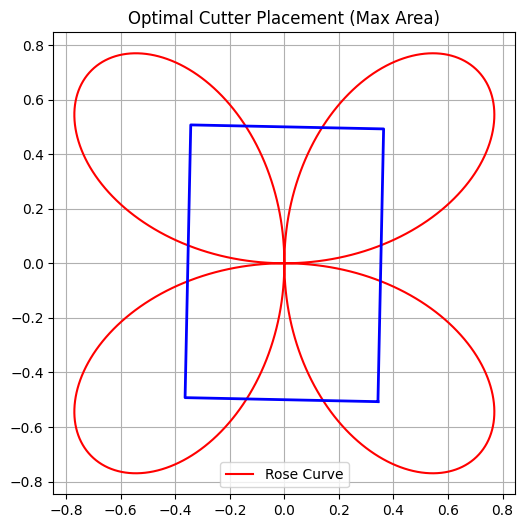

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate rose curve points
def rose_points(num_points=1000):
    theta = np.linspace(0, 2 * np.pi, num_points)
    r = np.sin(2 * theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Generate dense grid of points in bounding box
def generate_grid(step=0.01):
    x = np.arange(-1, 1, step)
    y = np.arange(-1, 1, step)
    xx, yy = np.meshgrid(x, y)
    points = np.column_stack((xx.ravel(), yy.ravel()))
    return points, step

# Check if point lies inside rose region
def is_inside_rose(x, y):
    return (x**2 + y**2)**3 <= 4 * x**2 * y**2

# Rotate and translate points into cutter frame
def rotate_and_translate(points, x0, y0, alpha):
    translated = points - np.array([x0, y0])
    c, s = np.cos(-alpha), np.sin(-alpha)
    R = np.array([[c, -s], [s, c]])
    return translated @ R.T

# Check if point is inside rectangle centered at origin
def is_inside_rect(local_points, width=1, height=1/np.sqrt(2)):
    hw, hh = width / 2, height / 2
    return (
        (np.abs(local_points[:, 0]) <= hw) &
        (np.abs(local_points[:, 1]) <= hh)
    )

# Brute-force grid search
def grid_search(points_in_rose, x_range, y_range, alpha_range, step=0.1):
    best_count = -1
    best_params = None

    for x0 in np.arange(*x_range, step):
        for y0 in np.arange(*y_range, step):
            for alpha in np.arange(*alpha_range, step):
                local = rotate_and_translate(points_in_rose, x0, y0, alpha)
                inside = is_inside_rect(local)
                count = np.sum(inside)
                if count > best_count:
                    best_count = count
                    best_params = (x0, y0, alpha)

    return best_params, best_count

# Draw rotated rectangle
def draw_rectangle(ax, x0, y0, alpha, width=1, height=1/np.sqrt(2)):
    hw, hh = width / 2, height / 2
    corners = np.array([
        [-hw, -hh], [hw, -hh], [hw, hh], [-hw, hh], [-hw, -hh]
    ])
    c, s = np.cos(alpha), np.sin(alpha)
    R = np.array([[c, -s], [s, c]])
    rotated = (corners @ R.T) + np.array([x0, y0])
    ax.plot(rotated[:, 0], rotated[:, 1], 'b-', lw=2)

# Main
rose_x, rose_y = rose_points()
grid, spacing = generate_grid(0.005)
mask = is_inside_rose(grid[:, 0], grid[:, 1])
points_in_rose = grid[mask]

# Brute-force optimization
params, count = grid_search(
    points_in_rose,
    x_range=(-0.8, 0.8),
    y_range=(-0.8, 0.8),
    alpha_range=(0, np.pi),
    step=0.05  # smaller = more accurate, slower
)

x0, y0, alpha = params
area_per_point = spacing ** 2
max_area = count * area_per_point

# Print results
print("=== Optimal Cutter Configuration ===")
print(f"Center (x0, y0): ({x0:.4f}, {y0:.4f})")
print(f"Angle (radians): {alpha:.4f}")
print(f"Angle (degrees): {np.degrees(alpha):.2f}")
print(f"Maximum area covered: {max_area:.6f} units²")

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(rose_x, rose_y, 'r-', label='Rose Curve')
# ax.scatter(points_in_rose[:, 0], points_in_rose[:, 1], s=0.1, alpha=0.3)
draw_rectangle(ax, x0, y0, alpha)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Optimal Cutter Placement (Max Area)")
plt.legend()
plt.show()


Best params: x0=-0.000, y0=-0.000, alpha=1.600 rad, count=23467


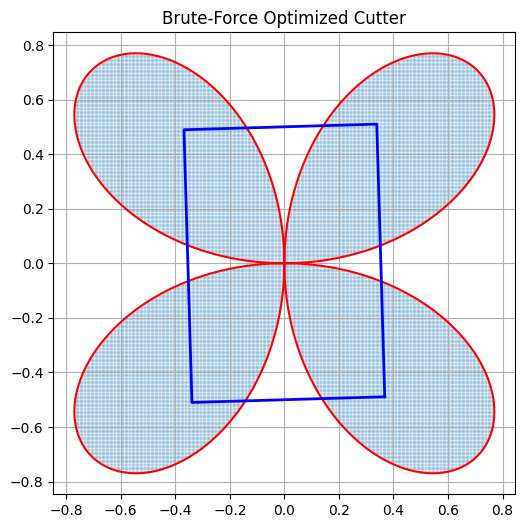

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate rose curve points
def rose_points(num_points=1000):
    theta = np.linspace(0, 2 * np.pi, num_points)
    r = np.sin(2 * theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Generate dense grid of points in bounding box
def generate_grid(step=0.01):
    x = np.arange(-1, 1, step)
    y = np.arange(-1, 1, step)
    xx, yy = np.meshgrid(x, y)
    points = np.column_stack((xx.ravel(), yy.ravel()))
    return points

# Check if point lies inside rose region
def is_inside_rose(x, y):
    return (x**2 + y**2)**3 <= 4 * x**2 * y**2

# Rotate and translate points into cutter frame
def rotate_and_translate(points, x0, y0, alpha):
    translated = points - np.array([x0, y0])
    c, s = np.cos(-alpha), np.sin(-alpha)
    R = np.array([[c, -s], [s, c]])
    return translated @ R.T

# Check if point is inside centered, axis-aligned rectangle
def is_inside_rect(local_points, width=1, height=1/np.sqrt(2)):
    hw, hh = width / 2, height / 2
    return (
        (np.abs(local_points[:, 0]) <= hw) &
        (np.abs(local_points[:, 1]) <= hh)
    )

# Brute-force search over x0, y0, alpha
def grid_search(points_in_rose, x_range, y_range, alpha_range, step=0.1):
    best_count = -1
    best_params = None

    for x0 in np.arange(*x_range, step):
        for y0 in np.arange(*y_range, step):
            for alpha in np.arange(*alpha_range, step):
                local = rotate_and_translate(points_in_rose, x0, y0, alpha)
                inside = is_inside_rect(local)
                count = np.sum(inside)
                if count > best_count:
                    best_count = count
                    best_params = (x0, y0, alpha)

    return best_params, best_count

# Draw rotated rectangle
def draw_rectangle(ax, x0, y0, alpha, width=1, height=1/np.sqrt(2)):
    hw, hh = width / 2, height / 2
    corners = np.array([
        [-hw, -hh], [hw, -hh], [hw, hh], [-hw, hh], [-hw, -hh]
    ])
    c, s = np.cos(alpha), np.sin(alpha)
    R = np.array([[c, -s], [s, c]])
    rotated = (corners @ R.T) + np.array([x0, y0])
    ax.plot(rotated[:, 0], rotated[:, 1], 'b-', lw=2)

# Main
rose_x, rose_y = rose_points()
grid = generate_grid(0.005)
mask = is_inside_rose(grid[:, 0], grid[:, 1])
points_in_rose = grid[mask]

# Grid search over (x0, y0, alpha)
params, count = grid_search(
    points_in_rose,
    x_range=(-0.8, 0.8),
    y_range=(-0.8, 0.8),
    alpha_range=(0, np.pi),
    step=0.1
)

x0, y0, alpha = params
print(f"Best params: x0={x0:.3f}, y0={y0:.3f}, alpha={alpha:.3f} rad, count={count}")

# Plot result
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(rose_x, rose_y, 'r-', label='Rose Curve')
ax.scatter(points_in_rose[:, 0], points_in_rose[:, 1], s=0.1, alpha=0.3)
draw_rectangle(ax, x0, y0, alpha)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Brute-Force Optimized Cutter")
plt.show()


=== Optimal Cutter Configuration ===
Center (x0, y0): (-0.0000, -0.0000)
Angle (radians): 1.5800
Angle (degrees): 90.53
Maximum area covered: 0.587225 units²


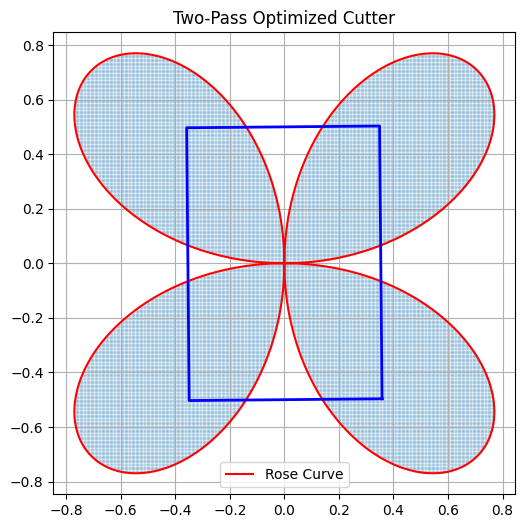

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate rose curve points
def rose_points(num_points=1000):
    theta = np.linspace(0, 2 * np.pi, num_points)
    r = np.sin(2 * theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Generate grid of points in bounding box
def generate_grid(step=0.005):
    x = np.arange(-1, 1, step)
    y = np.arange(-1, 1, step)
    xx, yy = np.meshgrid(x, y)
    points = np.column_stack((xx.ravel(), yy.ravel()))
    return points, step

# Check if point lies inside rose region
def is_inside_rose(x, y):
    return (x**2 + y**2)**3 <= 4 * x**2 * y**2

# Rotate and translate points into cutter frame
def rotate_and_translate(points, x0, y0, alpha):
    translated = points - np.array([x0, y0])
    c, s = np.cos(-alpha), np.sin(-alpha)
    R = np.array([[c, -s], [s, c]])
    return translated @ R.T

# Check if point is inside rectangle
def is_inside_rect(local_points, width=1, height=1/np.sqrt(2)):
    hw, hh = width / 2, height / 2
    return (
        (np.abs(local_points[:, 0]) <= hw) &
        (np.abs(local_points[:, 1]) <= hh)
    )

# Grid search
def grid_search(points_in_rose, x_range, y_range, alpha_range, step=0.1):
    best_count = -1
    best_params = None

    for x0 in np.arange(*x_range, step):
        for y0 in np.arange(*y_range, step):
            for alpha in np.arange(*alpha_range, step):
                local = rotate_and_translate(points_in_rose, x0, y0, alpha)
                inside = is_inside_rect(local)
                count = np.sum(inside)
                if count > best_count:
                    best_count = count
                    best_params = (x0, y0, alpha)

    return best_params, best_count

# Draw rectangle
def draw_rectangle(ax, x0, y0, alpha, width=1, height=1/np.sqrt(2)):
    hw, hh = width / 2, height / 2
    corners = np.array([[-hw, -hh], [hw, -hh], [hw, hh], [-hw, hh], [-hw, -hh]])
    c, s = np.cos(alpha), np.sin(alpha)
    R = np.array([[c, -s], [s, c]])
    rotated = (corners @ R.T) + np.array([x0, y0])
    ax.plot(rotated[:, 0], rotated[:, 1], 'b-', lw=2)

# Main
rose_x, rose_y = rose_points()
grid, spacing = generate_grid(0.005)
mask = is_inside_rose(grid[:, 0], grid[:, 1])
points_in_rose = grid[mask]

# === Pass 1: Coarse search ===
coarse_params, _ = grid_search(
    points_in_rose,
    x_range=(-0.8, 0.8),
    y_range=(-0.8, 0.8),
    alpha_range=(0, np.pi),
    step=0.1
)

# === Pass 2: Refined search around best result ===
x0_c, y0_c, alpha_c = coarse_params
refined_range = lambda center, r: (center - r, center + r)

fine_params, fine_count = grid_search(
    points_in_rose,
    x_range=refined_range(x0_c, 0.05),
    y_range=refined_range(y0_c, 0.05),
    alpha_range=refined_range(alpha_c, 0.1),
    step=0.01
)

x0, y0, alpha = fine_params
area_per_point = spacing ** 2
max_area = fine_count * area_per_point

# === Output ===
print("=== Optimal Cutter Configuration ===")
print(f"Center (x0, y0): ({x0:.4f}, {y0:.4f})")
print(f"Angle (radians): {alpha:.4f}")
print(f"Angle (degrees): {np.degrees(alpha):.2f}")
print(f"Maximum area covered: {max_area:.6f} units²")

# === Plot ===
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(rose_x, rose_y, 'r-', label='Rose Curve')
ax.scatter(points_in_rose[:, 0], points_in_rose[:, 1], s=0.1, alpha=0.3)
draw_rectangle(ax, x0, y0, alpha)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Two-Pass Optimized Cutter")
plt.legend()
plt.show()


In [6]:
import numpy as np

# Define the clover boundary function
def clover_boundary(x, y):
    """
    Defines the equation representing the boundary of the clover shape.
    """
    return (x**2 + y**2)**3 - 4 * x**2 * y**2

# Define the clover polar curve
def clover_curve(theta):
    """
    Defines the polar curve r = sin(2θ).
    """
    return np.sin(2 * theta)

# Compute the area of the clover inside a rotated rectangle
def clover_area(cx, cy, theta):
    """
    Calculates the clover area within a rotated rectangle using vectorized sampling.
    """
    w = 1.0
    h = 1 / np.sqrt(2)
    hw = w / 2
    hh = h / 2

    # Define rotation matrix
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

    # Create sample grid in bounding box
    num_samples = 100
    x = np.linspace(cx - w, cx + w, num_samples)
    y = np.linspace(cy - h, cy + h, num_samples)
    xx, yy = np.meshgrid(x, y)
    grid = np.column_stack((xx.ravel(), yy.ravel()))

    # Translate to center, apply inverse rotation
    translated = grid - np.array([cx, cy])
    inv_rotated = translated @ rotation_matrix  # No transpose needed here

    # Check which are inside the rectangle bounds
    in_rect = (
        (np.abs(inv_rotated[:, 0]) <= hw) &
        (np.abs(inv_rotated[:, 1]) <= hh)
    )

    # Check which are also inside the clover
    in_clover = clover_boundary(grid[:, 0], grid[:, 1]) <= 0

    inside_both = in_rect & in_clover
    area_per_point = (x[1] - x[0]) * (y[1] - y[0])
    total_area = np.sum(inside_both) * area_per_point

    return total_area, None  # We don't return vertices here


# Compute total area of the clover (r = sin(2θ))
def compute_overall_area():
    """
    Computes the total area of the clover shape using polar integral.
    """
    def integrand(theta):
        return clover_curve(theta)**2

    theta_min = 0
    theta_max = np.pi
    num_intervals = 100
    delta_theta = (theta_max - theta_min) / num_intervals

    area_sum = 0
    for i in range(num_intervals):
        theta_i = theta_min + i * delta_theta
        theta_ip1 = theta_min + (i + 1) * delta_theta
        area_sum += (integrand(theta_i) + integrand(theta_ip1)) * delta_theta / 2

    # Multiply by 1/2 for polar integral: (1/2)∫r² dθ
    return area_sum / 2

# Optimize cutter placement by shifting rectangle center
def rect_iterate():
    """
    Iterates over (cx, cy, theta) to maximize clover overlap.
    """
    best_area = 0
    best_params = None

    cx_vals = np.linspace(-1, 1, 100)
    cy_vals = np.linspace(-1, 1, 100)
    theta_vals = np.linspace(0, np.pi, 100)

    for cx in cx_vals:
        for cy in cy_vals:
            for theta in theta_vals:
                area, _ = clover_area(cx, cy, theta)
                if area > best_area:
                    best_area = area
                    best_params = (cx, cy, theta)

    return best_area, best_params


# Run everything
overall_clover_area = compute_overall_area()
print("Overall Area of the Clover:", overall_clover_area)

max_area, params = rect_iterate()
print("Maximum area of the clover within a rectangle:", max_area)
print("Best rectangle center and angle:", params)
print("Coverage:", 100 * max_area / overall_clover_area, "%")


Overall Area of the Clover: 0.7853981633974481
Maximum area of the clover within a rectangle: 0.595640606619338
Best rectangle center and angle: (np.float64(-0.010101010101010055), np.float64(-0.030303030303030276), np.float64(0.0))
Coverage: 75.83931747977823 %


In [21]:
import numpy as np


def inside_rose(x, y): 
    """ 
    Equation to check if inside_rose  
    """ 
    return (x**2 + y**2)**3 <= 4 * x ** 2 * y ** 2 

def inside_rectangle(points, width, height):  
    """
    Function to return points inside the rectangle 
    """ 
    half_width = width/2 
    half_height = height/2

    x = points[:, 0] 
    y = points[:, 1] 
    
    inside_rect = (np.abs(x) <= half_width) & (np.abs(y) <= half_height) 
    return inside_rect 

def generate_clover_points(num_points): 
    """ 
    Function to generate points inside of clover 
    Uses inside_rose as a mask and generates points inside of bounding box -1, 1 
    """ 
    x_points = np.linspace(-1, 1, num_points + 1) 
    y_points = np.linspace(-1, 1, num_points + 1)    

    step = x_points[1] - x_points[0]
    
    # Mesh Grid is returning x poins repeated over and over, and same with y points 
    xx, yy = np.meshgrid(x_points, y_points)  
    # xx.ravel() and yy.ravel() give the flattend version of these

    # The grid is now a collection of points in the form (x, y)
    grid = np.column_stack((xx.ravel(), yy.ravel())) 

    # We care about clover points however so let's mask this  
    # To do this masking we need a truth array or table for each point 
    x = grid[:, 0]  
    y = grid[:, 1] 
    mask = inside_rose(x, y)
    return grid[mask], step  

# Ok so so far, we've generated clover_points and shown they are inside the clover, now we need to iterate and check if it's inside rectangle 
# but this check only happens depending on what our points are, our points in this case get rotated and translated within the rose as the 
# rectangle rotates and translates, we are just doing it from the frame of the rose 
def transformation(points, xc, yc, alpha): 
    # we need to translate each point and now we need to rotate it 
    translated = points - np.array([xc, yc]) 
    sin = np.sin(-alpha) 
    cos = np.cos(-alpha) 
    rotation_matrix = np.array([[cos, -sin],[sin, cos]]) 

    rotated = np.dot(translated, rotation_matrix)  

    return rotated 

# Now that we've transformed we gotta try different inputs and check what's in the rectangle now 
# clover_points, step = generate_clover_points(100)  

def guess_and_check(points, num_points, step, xc, yc, alpha, x_0, x_1, y_0, y_1, alpha0, alpha1):  
    """ 
    points are clover points  
    num_points are the number of points for the linspace of x_0 and x_1 
    xc is inital x center point 
    yc is inital y center point 
    alpha is initial angle 
    x_0 is the left bound searched through 
    x_1 is the right bound seached through  
    y_0 is the left bound searched through 
    y_1 is the right bound searched through 
    alpha0 is the left bound
    alpha1 is the right bound  
    """   
    best_count = -1  
    best_xc = 0 
    best_yc = 0 
    best_alpha = 0

    x_range = np.linspace(x_0, x_1, num_points) 
    y_range = np.linspace(y_0, y_1, num_points) 
    alpha_range = np.linspace(alpha0, alpha1, num_points) 

    for x in x_range: 
        for y in y_range:  
            for alpha in alpha_range:   
                # Do I not need xc and yc? 
                # Well First we transform it
                transformed_points = transformation(points, x, y, alpha)  

                rectangle_points = inside_rectangle(transformed_points, width = 1, height = 1/np.sqrt(2))  

                best_count_points = np.sum(rectangle_points) 

                if best_count_points > best_count: 
                    best_count = best_count_points 
                    best_xc = x 
                    best_yc = y 
                    best_alpha = alpha 
    
    area_per_point = step ** 2
    total_area = area_per_point * best_count 

    return [best_xc, best_yc, best_alpha, best_count], total_area 

clover_points, step = generate_clover_points(100)  
arr, total_area = guess_and_check(clover_points, 100, step, 0, 0, 0, -1, 1, -1, 1, 0, np.pi) 

print(f"Best XC: {arr[0]}")
print(f"Best YC: {arr[1]}")
print(f"Best ALPHA: {arr[2]} radians ({np.degrees(arr[2]):.2f}°)")
print(f"Best COUNT: {arr[3]}") 
print(f"Total Area: {total_area}")

    
# Now that we've transformed we gotta try different inputs and check what's in the rectangle now 
# clover_points, step = generate_clover_points(100) 



    

Best XC: -0.010101010101010055
Best YC: -0.030303030303030276
Best ALPHA: 0.0 radians (0.00°)
Best COUNT: 1474
Total Area: 0.589600000000001


In [27]:
import numpy as np

def inside_rose(x, y):
    """
    Equation to check if a point (x,y) is inside the clover (lemniscate)
    given by (x^2 + y^2)^3 <= 4*x^2*y^2.
    """
    return (x**2 + y**2)**3 <= 4 * x**2 * y**2

def inside_rectangle(points, width, height):
    """
    Given an array of points (each a 2D coordinate), return a boolean array
    indicating which points lie inside an axis-aligned rectangle of size 
    (width x height) centered at (0,0).
    """
    half_width = width / 2
    half_height = height / 2

    x = points[:, 0]
    y = points[:, 1]

    inside_rect = (np.abs(x) <= half_width) & (np.abs(y) <= half_height)
    return inside_rect

def generate_clover_points(num_points):
    """
    Generates points within the bounding box [-1,1]x[-1,1] and then returns
    only those points that satisfy the inside_rose equation.
    
    Returns:
      - grid_points: A (M x 2) numpy array of points that lie inside the clover.
      - step: The spacing between points in the grid.
    """
    x_points = np.linspace(-1, 1, num_points + 1)
    y_points = np.linspace(-1, 1, num_points + 1)
    step = x_points[1] - x_points[0]
    
    # Create a grid of points.
    xx, yy = np.meshgrid(x_points, y_points)
    grid = np.column_stack((xx.ravel(), yy.ravel()))
    
    # Keep only the points inside the clover.
    mask = inside_rose(grid[:, 0], grid[:, 1])
    return grid[mask], step

def transformation(points, xc, yc, alpha):
    """
    Translates a set of 2D points by (xc, yc) and rotates them by the angle alpha.
    The rotation is done by -alpha so that from the clover frame we can test against
    an axis-aligned rectangle.
    """
    # Translate points relative to (xc, yc).
    translated = points - np.array([xc, yc])
    cos_val = np.cos(-alpha)
    sin_val = np.sin(-alpha)
    rotation_matrix = np.array([[cos_val, -sin_val],
                                [sin_val,  cos_val]])
    rotated = np.dot(translated, rotation_matrix)
    return rotated

def objective(xc, yc, alpha, points, width, height):
    """
    The objective (or "score") is the number of clover points that, after being
    transformed (translated and rotated by (xc, yc, alpha)), lie inside the 
    rectangle defined by width and height.
    """
    transformed_points = transformation(points, xc, yc, alpha)
    count = np.sum(inside_rectangle(transformed_points, width, height))
    return count

def metropolis_search(points, width, height, T_init, T_final, n_iter, sigma_center, sigma_angle):
    """
    Performs a simulated annealing search using the Metropolis criterion to
    maximize the number of clover points lying inside the rectangle after
    applying a translation (xc, yc) and rotation (alpha).

    Parameters:
      - points: The clover points array.
      - width, height: Dimensions of the rectangle.
      - T_init: The initial temperature.
      - T_final: The final temperature.
      - n_iter: Total number of iterations.
      - sigma_center: Standard deviation for proposals on the center (xc, yc).
      - sigma_angle: Standard deviation for proposals on the angle alpha.
      
    Returns:
      - best_params: A tuple (xc, yc, alpha) for the best-found parameters.
      - best_count: The maximum count of points inside the rectangle.
    """
    # Start at an initial guess.
    xc, yc, alpha = 0.0, 0.0, 0.0
    current_obj = objective(xc, yc, alpha, points, width, height)
    best_obj = current_obj
    best_params = (xc, yc, alpha)
    
    # Exponential cooling.
    T = T_init
    decay_rate = (T_final / T_init) ** (1.0 / n_iter)
    
    for i in range(n_iter):
        # Propose new candidate parameters.
        xc_new = xc + np.random.normal(scale=sigma_center)
        yc_new = yc + np.random.normal(scale=sigma_center)
        # Ensure the angle stays in [0, π) (periodicity of rectangle orientation)
        alpha_new = (alpha + np.random.normal(scale=sigma_angle)) % np.pi
        
        new_obj = objective(xc_new, yc_new, alpha_new, points, width, height)
        delta = new_obj - current_obj  # Note: we aim to maximize the count.
        
        # Accept moves that improve the objective; otherwise, accept with probability exp(delta/T).
        if delta >= 0 or np.random.rand() < np.exp(delta / T):
            xc, yc, alpha = xc_new, yc_new, alpha_new
            current_obj = new_obj
            if new_obj > best_obj:
                best_obj = new_obj
                best_params = (xc, yc, alpha)
        
        # Cool the temperature.
        T *= decay_rate
    
    return best_params, best_obj

# --- Main execution ---
if __name__ == "__main__":
    # Generate clover points from the rose/lemniscate.
    clover_points, step = generate_clover_points(100)
    
    # Define rectangle dimensions.
    width = 1.0
    height = 1.0 / np.sqrt(2)
    
    # Metropolis search parameters.
    T_init = 0.1
    T_final = 1e-4
    n_iter = 50000
    sigma_center = 0.02     # Adjusts how far we jump in xc, yc.
    sigma_angle = 0.01      # Adjusts the jump for the angle.
    
    best_params, best_count = metropolis_search(clover_points, width, height,
                                                  T_init, T_final, n_iter,
                                                  sigma_center, sigma_angle)
    best_xc, best_yc, best_alpha = best_params
    area_per_point = step**2
    total_area = best_count * area_per_point
    
    # Print out the best parameters and computed area.
    print(f"Best XC: {best_xc}")
    print(f"Best YC: {best_yc}")
    print(f"Best ALPHA: {best_alpha} radians ({np.degrees(best_alpha):.2f}°)")
    print(f"Best COUNT: {best_count}")
    print(f"Total Area estimate: {total_area}")


Best XC: 0.018237121799308115
Best YC: 0.029480838524902495
Best ALPHA: 0.005688303181448973 radians (0.33°)
Best COUNT: 1475
Total Area estimate: 0.5900000000000011


### Results 


### Performance 



## Background For Problem 3.3 

<div style="text-align: center;">
    <img src="Problem_3.3.png" alt="Problem_3.3.png" style="width:1200px; border:2px solid black;"/>
</div> 



## Problem 3.3

### Problem Description 

Given a DE for the velocity of a plane starting at (a, 0) and approaching the airport at (0, 0) being the following:  

$$
\begin{cases} 
\dfrac{dy}{dx} = \dfrac{y}{x} - k\sqrt{1 + \left(\dfrac{y}{x}\right)^2} \\ 
y(x = a) = 0
\end{cases}  
$$
where $k = \dfrac{w}{v_0}$ 

Solve the DE given the values $a = 100$, $w = 44$, and $v_0 = 88$. Please use any solution method including Euler's methods and the Runge-Kutta to compute the plane's trajectory until it lands at the airport.  

### Algorithm Description  

To solve this ODE, I decided to use Euler's forward method as it was straightforward to understand and code. The essential idea behind Euler's forward method is that from any point on a curve, we can get an approximation of a nearby point by moving along the tangent line. In our case since we are given the slope at a point (the differential) and the anchor point to start (a, 0), we have everything needed to do so, we simply need to decide a value of h, which in this case I chose 0.0001 for more accuracy without running into a division of 0 error in the formuala.

More formally this was derived by taking the forward difference approximation of a derivative and solving: 

$y'(x)\approx (y(x+h) - y(x))/h$   
$y(x+h) \approx y(x) + h * y'(x)$     
$y' = f(x, y(x))$        
$y(x+h) \approx y(x) + h * f(x, y(x))$    

So with a step size of h we construct the sequence:  
$x_0, x_1 = x_0 + h, x_2 = x_1 + h, ....$ and the numerical solutions are
$y_{n+1} \approx y_{n} + h * f(x_n, y_n)$

So using the sequence above we can construct the trajectory of the plane. The only caveats I had to account for was that we wanted x to change negatively as our target of (0, 0) was the stopping point for this trajectory, so instead of adding h I subtracted by h for calculating the next $x_n$ meaning we also needed to change the sign for calculating $y_{n+1}$ as I needed to subtract from $y_n$ now. Additionally, I graphed the trajectory of the curve and printed 100 points on the trajectory to visualize the trajectory that's been constructed. I also put in a safe guard to make sure our answer did not overshoot hitting x = 0, by changing the step size at the very end if it was closer than h away. 

#### Psuedocode 

**Euler Forward Method**   

---
$a \leftarrow 100$    
$w \leftarrow 44$    
$v_0 \leftarrow 88$    
$x_0 \leftarrow a$    
$y_0 \leftarrow 0$    
$target \leftarrow 0$    
$k \leftarrow w/v_0$  
$h \leftarrow 0.0001$   
$f \leftarrow (y/x) - (k * \sqrt{1 + ((y/x)^2)})$     

$x\_vals \leftarrow [x_0]$    
$x\_vals \leftarrow [y_0]$    

$\text{while} \enspace x\_vals[-1] > target:$  
&emsp;  $y_n = y\_vals[-1]$     
&emsp;  $x_n = x\_vals[-1]$     
&emsp;  if $x_n - h < target:$    
&emsp;&emsp; $h = x_n - target$        
&emsp;  $y\_next = y_n - h*(f(x_n, y_n))$    
&emsp;  $x\_next = x_n - h$     
return $x\_vals, y\_vals$    

---
#### Code 

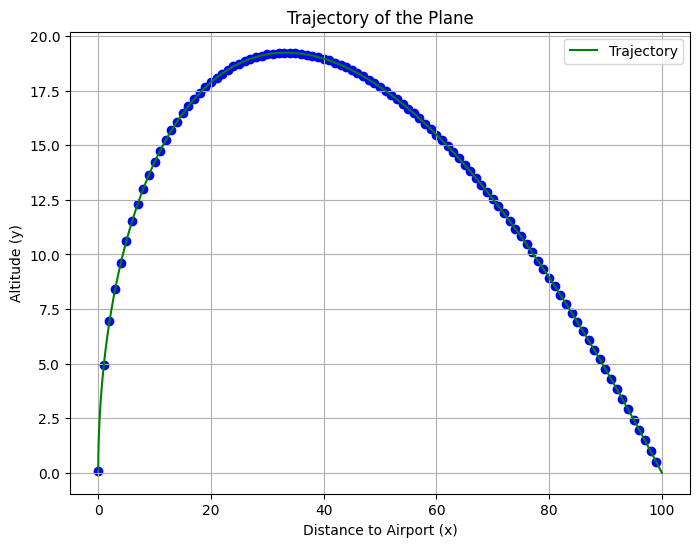

Coordinates (x, y) of 100 evenly spaced points: 
(0.00, 0.03)
(1.00, 4.95)
(2.00, 6.93)
(3.00, 8.40)
(4.00, 9.60)
(5.00, 10.62)
(6.00, 11.51)
(7.00, 12.30)
(8.00, 13.01)
(9.00, 13.65)
(10.00, 14.23)
(11.00, 14.76)
(12.00, 15.24)
(13.00, 15.68)
(14.00, 16.09)
(15.00, 16.46)
(16.00, 16.80)
(17.00, 17.11)
(18.00, 17.39)
(19.00, 17.65)
(20.00, 17.89)
(21.00, 18.10)
(22.00, 18.29)
(23.00, 18.46)
(24.00, 18.62)
(25.00, 18.75)
(26.00, 18.87)
(27.00, 18.97)
(28.00, 19.05)
(29.00, 19.12)
(30.00, 19.17)
(31.00, 19.21)
(32.00, 19.23)
(33.00, 19.24)
(34.00, 19.24)
(35.00, 19.23)
(36.00, 19.20)
(37.00, 19.16)
(38.00, 19.11)
(39.00, 19.05)
(40.00, 18.97)
(41.00, 18.89)
(42.00, 18.79)
(43.00, 18.69)
(44.00, 18.57)
(45.00, 18.45)
(46.00, 18.31)
(47.00, 18.17)
(48.00, 18.01)
(49.00, 17.85)
(50.00, 17.68)
(51.00, 17.50)
(52.00, 17.31)
(53.00, 17.11)
(54.00, 16.90)
(55.00, 16.69)
(56.00, 16.46)
(57.00, 16.23)
(58.00, 15.99)
(59.00, 15.75)
(60.00, 15.49)
(61.00, 15.23)
(62.00, 14.96)
(63.00, 14.68)
(64.00

In [51]:
import numpy as np
import matplotlib.pyplot as plt
# Defining Given Constants with a little bit of math 
a = 100 # Distance from airport
w = 44  # wind speed 
v_0 = 88 # initial velocity 
x_0 = a  # initial x_value 
y_0 = 0  # initial y_value 
h = 0.0001 # Step size used for difference approximation
k = w/v_0 # constant factor in ODE

def f(x, y):  
    """Differential Equation from ODE"""
    return (y/x) - (k * np.sqrt(1 + ((y/x) ** 2)))   

def euler_forward(f, x_0, y_0, h, target):  
    # Start Making Arrays to hold x_values and y_values of sequence
    x_values = [x_0] 
    y_values = [y_0]  

    # Condition is > target as we are decreasing x
    while x_values[-1] > target:  
        y_n = y_values[-1]  
        x_n = x_values[-1]  

        # Safegaurd to prevent approximation from overshooting
        if x_n - h < target: 
            h = x_n - target 
        
        # Euler Forward Sequences, - instead of + as h needs to be - 
        y_next = y_n - (h * f(x_n, y_n))
        x_next = x_n - h 

        # We append the values as we reference the last index in the equation for x_n, y_n
        y_values.append(y_next) 
        x_values.append(x_next)   
        
    # Reversed the arrays for ease of printing 
    return np.array(x_values[::-1]), np.array(y_values[::-1])

x_vals, y_vals = euler_forward(f, x_0, y_0, h, 0) 

# print(x_vals[0]) 
# print(y_vals[0])  
# print(len(x_vals)) 
# print(len(y_vals))

plt.figure(figsize=(8,6))  
plt.plot(x_vals[1::], y_vals[1::], color="green", label="Trajectory") 
plt.scatter(x_vals[1::int(len(x_vals)/100)], y_vals[1::int(len(x_vals)/100)], color="blue") 
plt.xlabel("Distance to Airport (x)") 
plt.ylabel("Altitude (y)") 
plt.title("Trajectory of the Plane") 
plt.legend() 
plt.grid(True) 
plt.show()

# Print Coordinates
print("Coordinates (x, y) of 100 evenly spaced points: ")  
step = len(x_vals) // 100
for i in range(0, len(x_vals), step): 
    print(f"({x_vals[i]:.2f}, {y_vals[i]:.2f})")


### Results 

I obtained the following Graph approximating the trajectory of the plane: 

![Problem_3.3_Trajectory_Graph](Problem_3.3_Trajectory_Graph.png)   

I also printed the following 100 points along the approximated trajectory: 
Coordinates (x, y) of 100 evenly spaced points:     
(0.00, 0.03)   
(1.00, 4.95)   
(2.00, 6.93)   
(3.00, 8.40)    
(4.00, 9.60)   
(5.00, 10.62)   
(6.00, 11.51)     
(7.00, 12.30)   
(8.00, 13.01)    
(9.00, 13.65)   
(10.00, 14.23)   
(11.00, 14.76)    
(12.00, 15.24)   
(13.00, 15.68)    
(14.00, 16.09)   
(15.00, 16.46)    
(16.00, 16.80)   
(17.00, 17.11)   
(18.00, 17.39)   
(19.00, 17.65)   
(20.00, 17.89)   
(21.00, 18.10)   
(22.00, 18.29)   
(23.00, 18.46)   
(24.00, 18.62)   
(25.00, 18.75)   
(26.00, 18.87)   
(27.00, 18.97)   
(28.00, 19.05)    
(29.00, 19.12)   
(30.00, 19.17)   
(31.00, 19.21)   
(32.00, 19.23)   
(33.00, 19.24)   
(34.00, 19.24)   
(35.00, 19.23)   
(36.00, 19.20)    
(37.00, 19.16)    
(38.00, 19.11)    
(39.00, 19.05)    
(40.00, 18.97)   
(41.00, 18.89)   
(42.00, 18.79)   
(43.00, 18.69)   
(44.00, 18.57)  
(45.00, 18.45)   
(46.00, 18.31)   
(47.00, 18.17)   
(48.00, 18.01)   
(49.00, 17.85)   
(50.00, 17.68)   
(51.00, 17.50)  
(52.00, 17.31)   
(53.00, 17.11)  
(54.00, 16.90)   
(55.00, 16.69)   
(56.00, 16.46)   
(57.00, 16.23)   
(58.00, 15.99)   
(59.00, 15.75)   
(60.00, 15.49)  
(61.00, 15.23)  
(62.00, 14.96)  
(63.00, 14.68)  
(64.00, 14.40)    
(65.00, 14.11)   
(66.00, 13.81)  
(67.00, 13.51)   
(68.00, 13.19)    
(69.00, 12.88)   
(70.00, 12.55)   
(71.00, 12.22)    
(72.00, 11.88)    
(73.00, 11.53)   
(74.00, 11.18)   
(75.00, 10.83)   
(76.00, 10.46)   
(77.00, 10.09)   
(78.00, 9.71)   
(79.00, 9.33)   
(80.00, 8.94)   
(81.00, 8.55)   
(82.00, 8.15)   
(83.00, 7.74)   
(84.00, 7.33)   
(85.00, 6.91)   
(86.00, 6.49)   
(87.00, 6.06)   
(88.00, 5.63)   
(89.00, 5.19)   
(90.00, 4.74)   
(91.00, 4.29)   
(92.00, 3.84)   
(93.00, 3.38)    
(94.00, 2.91)   
(95.00, 2.44)   
(96.00, 1.96)   
(97.00, 1.48)   
(98.00, 0.99)    
(99.00, 0.50)   
(100.00, 0.00)     

### Performance 


The performance of Euler's Forward Method is dependent on the number of points generated to show the trajectory of the plot, if we are generating n points then the time complexity is O(n) as we have to do 2n operations to calculate each point and the space complexity is O(n) as well as we need to store each point. In terms of Location Truncation Error, the error of Euler's forward method is order-1. 